کتابخانه پانداس و نامپای را فراخوانی می‌کنیم

In [69]:
import pandas as pd
import numpy as np
from func import *

****1****

دیتا های داخل اکسل را فراخوانی می‌کنیم

In [70]:
df = pd.read_excel('data.xlsx')
df

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


*****1*****

دیتا های خالی را پیدا میکنیم

In [71]:
df.isnull().sum()

Years         0
Salary        0
material 1    0
material 2    0
demand        0
price         0
dtype: int64

 مقادیر خالی سه مقادر در بخش حقوق کارکنان بود این مقادیر را در جدول با میانگین مقادیر قبل و بعد پر کردیم و ثبت نهایی کردیم در اکسل اولیه 

در اینجا ما تابعی تعریف کردیم که مقادیر خالی در ستون مد نظر را پیدا کند و در صورت پر بودن مقادیر بسال قبل و سال بعدش میانگین این مقادیر را درآن قرار می‌دهد و در اکسل اصلی این مقادیر را نهایی می‌کند

In [72]:
def fill_nan(df,column):
    for i in range(1,len(df)-1):
        if pd.isna(df.loc[i,column]):
            uper_cell = df.loc[i - 1,column]
            lower_cell = df.loc[i + 1,column]
            if pd.notna(uper_cell) and pd.notna(lower_cell):
                 df.loc[i, column] = (uper_cell + lower_cell) / 2
fill_nan(df, 'Salary')
df.to_excel('data.xlsx', index=False)
df


,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


مشاهده می‌شود که مقادیرخالی مان صفر شده اند این نکته مهم است که  با توجخه به اینکه در اکسل ثبت نهایی کردیم این مقادیر خالی را در هر دو جدول مقادیر خالی همواره مقادیر صفر است. 

In [73]:
df.isnull().sum()

Years         0
Salary        0
material 1    0
material 2    0
demand        0
price         0
dtype: int64

*****2*****

از کتابخانه اسکیلرن بخش مدل های خطی آن را فراخوانی می‌کنیم


In [74]:
from sklearn.linear_model import LinearRegression

تابعی برای بدست اوردن رگرسیون مینویسیم به این صورت که ابتدا مقادیر طولی و عرضی ان را مشخص می‌کنیم و انها رو مدل می‌کنیم و این مدل را فیت می‌کنیم و با استفاده از خاصیت کتابخانه عرض از مبدا و شیب را بدست اورده و انها را با این تایع برمیگردانیم

In [75]:
def regresion(x,y):
    X = x.values.reshape(-1,1)
    Y = y.values.reshape(-1,1)
    model = LinearRegression()
    model.fit(X,Y)
    intercept = model.intercept_[0]
    coefficient = model.coef_[0][0]
    return intercept ,coefficient 

تابعی برای پیش‌بینی مقادیر نوشته ایم که در ان از تایع رگرسیون نیز استفاده کردیم 

In [76]:
def predict(x,y,t):
    z = regresion(y,t)
    return z[0] + z[1] * x

تابعی برای دقت رگرسیون تعریف کردیم که مانند تابع رگرسیون است با فرق اینکه از پیش فرض دیگر کتابخانه در ان استفاده کردیم

In [77]:
def score(x,y):
    X = x.values.reshape(-1,1)
    Y = y.values.reshape(-1,1)
    model = LinearRegression()
    model.fit(X,Y)
    score = model.score(X,Y)
    return score


*****2*****


مقادیر رگرسیون(عرض از مبدا وشیب) را با استفاده از تابعی که بالا تعریف کردیم بدست اوردیم

In [78]:
regresion(df['Years'],df['Salary'])

(-5249679.051136364, 2655.052640374332)

پیش بینی را تا سال 2050 ادامه دادیم

**2023-2050**


In [79]:
predicted_list=[]
for i in range(2023,2051):
    predicted_list.append((i,predict(i,df['Years'],df['Salary'])))
predicted_list

[(2023, 121492.44034090918),
 (2024, 124147.49298128393),
 (2025, 126802.54562165774),
 (2026, 129457.5982620325),
 (2027, 132112.6509024063),
 (2028, 134767.70354278106),
 (2029, 137422.7561831558),
 (2030, 140077.80882352963),
 (2031, 142732.86146390438),
 (2032, 145387.9141042782),
 (2033, 148042.96674465295),
 (2034, 150698.01938502677),
 (2035, 153353.07202540152),
 (2036, 156008.12466577534),
 (2037, 158663.1773061501),
 (2038, 161318.2299465239),
 (2039, 163973.28258689865),
 (2040, 166628.3352272734),
 (2041, 169283.38786764722),
 (2042, 171938.44050802197),
 (2043, 174593.4931483958),
 (2044, 177248.54578877054),
 (2045, 179903.59842914436),
 (2046, 182558.6510695191),
 (2047, 185213.70370989293),
 (2048, 187868.75635026768),
 (2049, 190523.80899064243),
 (2050, 193178.86163101625)]

کتابخانه متپلات را برای رسم نمودار ها فراخوانی کردیم

In [80]:
import matplotlib.pylab as plt

تابعی تعریف کردیم که نمودار نقطه ای مقادیر و رگرسیون خطی را در ان رسم کنیم

In [81]:
def pltreg(m,n):
    plt.scatter(m,n)
    X = m.values.reshape(-1,1)
    Y = n.values.reshape(-1,1)
    model = LinearRegression()
    model.fit(X,Y)
    plt.plot(m,model.predict(X),c = 'red')
    plt.show()

**3**

نمودار حقوق بر اساس سال

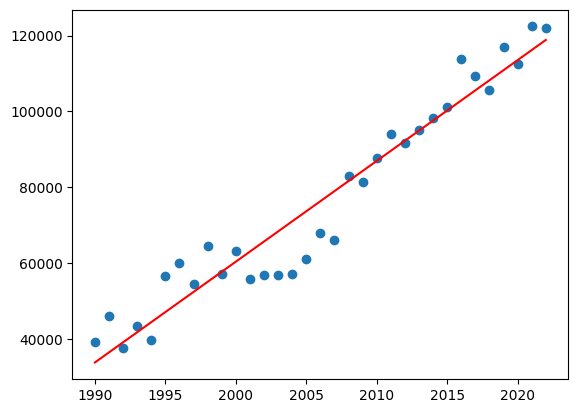

In [82]:
pltreg(df['Years'],df['Salary'])

دقت رگرسیون بالا با استفاده از تابع تعریف شده

In [83]:
score(df['Years'],df['Salary'])

0.9312739842698768

**4**

تابعی تعریف کردیم برای بدست اوردن ارزش اینده مقادیر 

قیمت متریال 1 تا سال 2050 با استفاده از تابع تعریف شده که در فایل فانکشنش آمده است

In [84]:
i = 0.05 + 0.01
for m in range(2023,2051):
    n=m-df.iloc[0,0]
    p = df.iloc[0,2]
    print(f'{m} : {POM1(i,n,p)}')

2023 : 1368.1179765596917
2024 : 1450.2050551532734
2025 : 1537.21735846247
2026 : 1629.4503999702179
2027 : 1727.2174239684311
2028 : 1830.8504694065373
2029 : 1940.7014975709294
2030 : 2057.1435874251856
2031 : 2180.5722026706967
2032 : 2311.4065348309387
2033 : 2450.090926920795
2034 : 2597.0963825360427
2035 : 2752.922165488206
2036 : 2918.097495417498
2037 : 3093.1833451425478
2038 : 3278.774345851101
2039 : 3475.5008066021674
2040 : 3684.030854998298
2041 : 3905.0727062981955
2042 : 4139.377068676087
2043 : 4387.739692796653
2044 : 4651.004074364452
2045 : 4930.06431882632
2046 : 5225.868177955899
2047 : 5539.420268633254
2048 : 5871.785484751249
2049 : 6224.092613836324
2050 : 6597.538170666505


*****5*****


ابتدا تمامی قیمت های ماده دو را از طریق اف به پی به سال 1990 میبریم تا ارزش هر سال را به ازای سال پایه داشته باشیم ، سپس با استفاده از تقریب خطی  یعنی رگرسیون ارزش های آتی آن را پیشبینی میکنیم.

داده های ستون پی ، ارزش بر اساس سال 1990 ماده دو را در هر سال نشان میدهد

In [85]:
df['n'] = df['Years']-1990

df['P'] = df.apply(lambda row: fp_formula(row['material 2'], row['n']), axis=1)
print(df)

    Years    Salary   material 1  material 2  demand   price   n      P
0    1990   39343.0   200.000000   89.600000     103  1200.0   0  89.60
1    1991   46205.0   212.000000   92.662500     104  1375.0   1  88.25
2    1992   37731.0   224.720000   95.807250     101  1451.0   2  86.90
3    1993   43525.0   238.203200   99.034819      99  1593.0   3  85.55
4    1994   39891.0   252.495392  102.345626      95  1718.5   4  84.20
5    1995   56642.0   267.645116  105.739927      96  1844.0   5  82.85
6    1996   60150.0   283.703822  109.217795      95  1969.5   6  81.50
7    1997   54445.0   300.726052  112.779099      92  2095.0   7  80.15
8    1998   64445.0   318.769615  116.423489      92  2220.5   8  78.80
9    1999   57189.0   337.895792  120.150370      87  2346.0   9  77.45
10   2000   63218.0   358.169539  123.958881      84  2471.5  10  76.10
11   2001   55794.0   379.659712  127.847867      86  2597.0  11  74.75
12   2002   56957.0   402.439294  131.815854      87  2722.5  12

*****6*****

برای شیب خط و عرض از مبدا ، از تابعی که قبلا استفاده کردیم ، استفاده میکنیم

In [86]:
regresion(df['Years'],df['P'])

(2776.1000000000063, -1.3500000000000032)

In [87]:
predicted_list=[]
for i in range(1990,2023):
    predicted_list.append((i,predict(i,df['Years'],df['P'])))
predicted_list

[(1990, 89.59999999999991),
 (1991, 88.25),
 (1992, 86.90000000000009),
 (1993, 85.54999999999973),
 (1994, 84.19999999999982),
 (1995, 82.84999999999991),
 (1996, 81.5),
 (1997, 80.15000000000009),
 (1998, 78.79999999999973),
 (1999, 77.44999999999982),
 (2000, 76.09999999999991),
 (2001, 74.75),
 (2002, 73.40000000000009),
 (2003, 72.04999999999973),
 (2004, 70.69999999999982),
 (2005, 69.34999999999991),
 (2006, 68.0),
 (2007, 66.64999999999964),
 (2008, 65.29999999999973),
 (2009, 63.94999999999982),
 (2010, 62.59999999999991),
 (2011, 61.25),
 (2012, 59.899999999999636),
 (2013, 58.54999999999973),
 (2014, 57.19999999999982),
 (2015, 55.84999999999991),
 (2016, 54.5),
 (2017, 53.149999999999636),
 (2018, 51.79999999999973),
 (2019, 50.44999999999982),
 (2020, 49.09999999999991),
 (2021, 47.75),
 (2022, 46.399999999999636)]

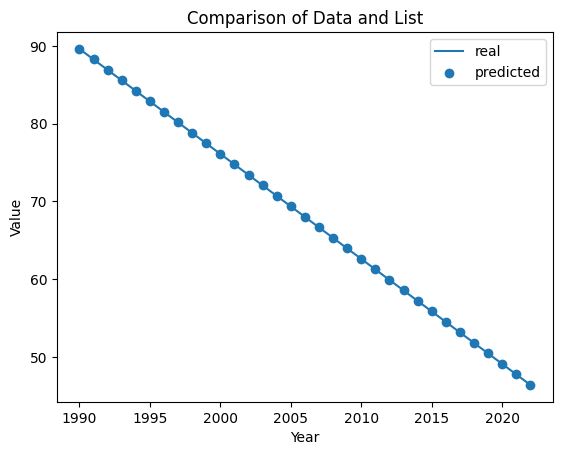

In [88]:
year = df.iloc[:, 0]  # First column is the year
value = df.iloc[:, 7] 
x=[]
y=[]
for i in predicted_list:
    x.append(i[0])
    y.append(i[1])
    
plt.plot(year, value, label='real')
plt.scatter(x, y, label='predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of Data and List')
plt.legend()
plt.show()


In [89]:
from sklearn.metrics import r2_score

r2 = r2_score(value, y)
print("R-squared: ", r2)

R-squared:  1.0


مشاهده میکنیم که داده های پیشبینی شده و داده های بدست امده با تقریب خوبی کاملا مطابق هم هستند و میتوان داده ها را خطی تقریب زد

*****7*****

ابتدا تابع گفته شده را تعریف میکنیم

In [90]:
def efactor(n):
    return 2.71828183**(-n/50)

سپس داده های خواسته شده را بدست میاوریم.

In [91]:
demand=[]
for i in range(1990,2051):
    demand.append(np.array([efactor(i-1990)]))
demand

[array([1.]),
 array([0.98019867]),
 array([0.96078944]),
 array([0.94176453]),
 array([0.92311635]),
 array([0.90483742]),
 array([0.88692044]),
 array([0.86935824]),
 array([0.85214379]),
 array([0.83527021]),
 array([0.81873075]),
 array([0.8025188]),
 array([0.78662786]),
 array([0.77105159]),
 array([0.75578374]),
 array([0.74081822]),
 array([0.72614904]),
 array([0.71177032]),
 array([0.69767633]),
 array([0.68386141]),
 array([0.67032005]),
 array([0.65704682]),
 array([0.64403642]),
 array([0.63128365]),
 array([0.61878339]),
 array([0.60653066]),
 array([0.59452055]),
 array([0.58274825]),
 array([0.57120906]),
 array([0.55989837]),
 array([0.54881164]),
 array([0.53794444]),
 array([0.52729242]),
 array([0.51685133]),
 array([0.50661699]),
 array([0.4965853]),
 array([0.48675226]),
 array([0.47711392]),
 array([0.46766643]),
 array([0.45840601]),
 array([0.44932896]),
 array([0.44043165]),
 array([0.43171052]),
 array([0.42316208]),
 array([0.41478291]),
 array([0.40656966])

*****8*****


سپس مدل رگرسیون خود را طبق دستور العمل داده شده فیت میکنیم.

In [92]:
model = LinearRegression()

In [93]:
demand=demand[:33]
demand

[array([1.]),
 array([0.98019867]),
 array([0.96078944]),
 array([0.94176453]),
 array([0.92311635]),
 array([0.90483742]),
 array([0.88692044]),
 array([0.86935824]),
 array([0.85214379]),
 array([0.83527021]),
 array([0.81873075]),
 array([0.8025188]),
 array([0.78662786]),
 array([0.77105159]),
 array([0.75578374]),
 array([0.74081822]),
 array([0.72614904]),
 array([0.71177032]),
 array([0.69767633]),
 array([0.68386141]),
 array([0.67032005]),
 array([0.65704682]),
 array([0.64403642]),
 array([0.63128365]),
 array([0.61878339]),
 array([0.60653066]),
 array([0.59452055]),
 array([0.58274825]),
 array([0.57120906]),
 array([0.55989837]),
 array([0.54881164]),
 array([0.53794444]),
 array([0.52729242])]

In [94]:
X = np.array(demand).reshape(-1,1)
Y = df['demand'].values.reshape(-1,1)
model.fit(X,Y)

LinearRegression()

In [95]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

In [96]:
def predict2(x):
    return intercept + coefficient * x

In [97]:
predicted_list=[]
for i in range(33):
    predicted_list.append((i+1990,predict2(demand[i])))
predicted_list

[(1990, array([104.62800381])),
 (1991, array([102.62092026])),
 (1992, array([100.65357962])),
 (1993, array([98.72519494])),
 (1994, array([96.83499483])),
 (1995, array([94.98222319])),
 (1996, array([93.16613889])),
 (1997, array([91.38601546])),
 (1998, array([89.64114084])),
 (1999, array([87.93081706])),
 (2000, array([86.25435995])),
 (2001, array([84.61109892])),
 (2002, array([83.00037664])),
 (2003, array([81.42154879])),
 (2004, array([79.87398384])),
 (2005, array([78.35706272])),
 (2006, array([76.87017865])),
 (2007, array([75.41273686])),
 (2008, array([73.98415435])),
 (2009, array([72.58385967])),
 (2010, array([71.21129268])),
 (2011, array([69.86590434])),
 (2012, array([68.54715647])),
 (2013, array([67.25452156])),
 (2014, array([65.98748254])),
 (2015, array([64.74553257])),
 (2016, array([63.52817485])),
 (2017, array([62.33492244])),
 (2018, array([61.165298])),
 (2019, array([60.01883369])),
 (2020, array([58.89507088])),
 (2021, array([57.79356007])),
 (2022,

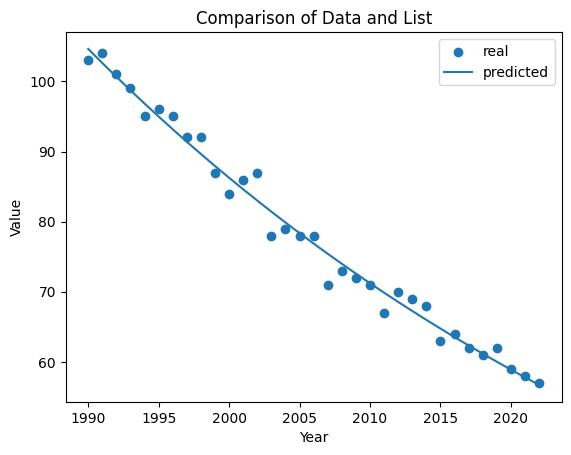

In [98]:
year = df.iloc[:, 0]  # First column is the year
value = df.iloc[:, 4] 
x=[]
y=[]
for i in predicted_list:
    x.append(i[0])
    y.append(i[1])
    
plt.scatter(year, value, label='real')
plt.plot(x, y, label='predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of Data and List')
plt.legend()
plt.show()


In [99]:
from sklearn.metrics import r2_score

r2 = r2_score(value, y)
print("R-squared: ", r2)

R-squared:  0.9849573838494837


امتیاز آر تو و همچنین نمودار خواسته شده را میتوانیم مشاهده بکنیم.

**10**

رگرسیون خطی قیمت و سال را بدست می آوریم

In [100]:
regresion(df['Years'],df['price'])

(-248528.5, 125.5)

مقادیر تا سال 2050 را بدست اوردیم

In [101]:
predicted_list=[]
for i in range(2023,2051):
    predicted_list.append((i,predict(i,df['Years'],df['price'])))
predicted_list

[(2023, 5358.0),
 (2024, 5483.5),
 (2025, 5609.0),
 (2026, 5734.5),
 (2027, 5860.0),
 (2028, 5985.5),
 (2029, 6111.0),
 (2030, 6236.5),
 (2031, 6362.0),
 (2032, 6487.5),
 (2033, 6613.0),
 (2034, 6738.5),
 (2035, 6864.0),
 (2036, 6989.5),
 (2037, 7115.0),
 (2038, 7240.5),
 (2039, 7366.0),
 (2040, 7491.5),
 (2041, 7617.0),
 (2042, 7742.5),
 (2043, 7868.0),
 (2044, 7993.5),
 (2045, 8119.0),
 (2046, 8244.5),
 (2047, 8370.0),
 (2048, 8495.5),
 (2049, 8621.0),
 (2050, 8746.5)]

**11**

تابع نقطه ای و خطی را رسم کردیم و با هم مقایسه می‌کنیم

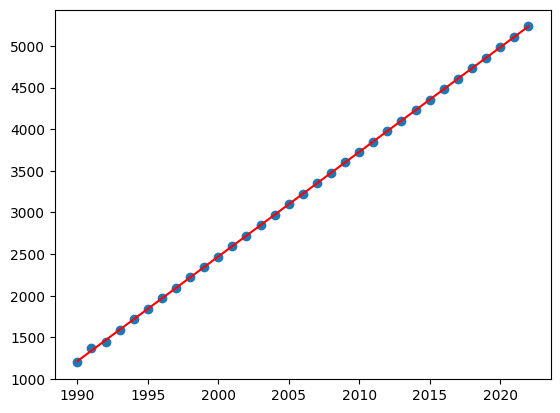

In [102]:
pltreg(df['Years'],df['price'])

دقت رگرسیون را بدست می اوریم

In [103]:
score(df['Years'],df['price'])

0.9999653378861689

****خواسته ها****

In [104]:
df

,Years,Salary,material 1,material 2,demand,price,n,P
0,1990,39343.0,200.000000,89.600000,103,1200.0,0,89.60
1,1991,46205.0,212.000000,92.662500,104,1375.0,1,88.25
2,1992,37731.0,224.720000,95.807250,101,1451.0,2,86.90
3,1993,43525.0,238.203200,99.034819,99,1593.0,3,85.55
4,1994,39891.0,252.495392,102.345626,95,1718.5,4,84.20
5,1995,56642.0,267.645116,105.739927,96,1844.0,5,82.85
6,1996,60150.0,283.703822,109.217795,95,1969.5,6,81.50
7,1997,54445.0,300.726052,112.779099,92,2095.0,7,80.15
8,1998,64445.0,318.769615,116.423489,92,2220.5,8,78.80
9,1999,57189.0,337.895792,120.150370,87,2346.0,9,77.45


*****1*****

ابتدا برای هر ستون ، یک مدل رگرسیون فیت میکنیم، سپس داده های هر ستون را پیشبینی کرده و در ستون مد نظر ذخیره میکنیم، در مرحله بعد تخفیفات گفته شده را اعمال میکنیم و در انتها سود هر سال را طبق داده های پیشبینی شده ، بدست میاوریم.

In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# assume your dataframe is named 'df'

# split data into training and testing sets
X = df[['Years']]
y_Salary = df['Salary']
y_material1 = df['material 1']
y_material2 = df['material 2']
y_demand = df['demand']
y_price = df['price']

X_train, y_Salary_train = X, y_Salary
X_train, y_material1_train = X, y_material1
X_train,  y_material2_train = X, y_material2
X_train,  y_demand_train =X, y_demand
X_train, y_price_train =X, y_price

# create and train a linear regression model for each column
model_Salary = LinearRegression()
model_Salary.fit(X_train, y_Salary_train)

model_material1 = LinearRegression()
model_material1.fit(X_train, y_material1_train)

model_material2 = LinearRegression()
model_material2.fit(X_train, y_material2_train)

model_demand = LinearRegression()
model_demand.fit(X_train, y_demand_train)

model_price = LinearRegression()
model_price.fit(X_train, y_price_train)
l=[]
for i in range(2023,2100):
    l.append(i)
# forecast each column for future years (e.g. 2023, 2024, ...)
future_years = pd.DataFrame({'Years': l})
future_Salary = model_Salary.predict(future_years)
future_material1 = model_material1.predict(future_years)
future_material2 = model_material2.predict(future_years)
future_demand = model_demand.predict(future_years)
future_price = model_price.predict(future_years)
for i in range(len(future_demand)):
    if future_demand[i]>60:
        future_material2[i]*=(1-0.18)
    elif 40<future_demand[i]<=60:
        future_material2[i]*=(1-0.1)
    elif 20<future_demand[i]<=40:
        future_material2[i]*=(1-0.05)

# compute profit for future years
future_profit = (future_price - future_material1 - future_material2) * future_demand - future_Salary

# print the forecasted profit
for i in range(len(future_profit)):
    if future_profit[i] > 0:
        print(i+2023,future_profit[i])
    else:
        print(f'Year : {i+2023} proft : {future_profit[i]} **********')
        break

2023 91202.87188038634
2024 87175.28851841885
2025 82882.2802762446
2026 78323.84715385642
2027 73499.98915125956
2028 68410.70626845071
2029 63055.998505434225
2030 57435.865862206265
2031 51550.308338766365
2032 44885.269381457125
2033 38480.20083882823
2034 31810.328625761234
2035 24875.65274225312
2036 17676.173188309156
2037 10211.889963922295
2038 2482.803069096204
Year : 2039 proft : -5511.08749616993 **********


مشاهده میکنیم که تا سال 2039 میتوانیم سود بکنیم.

****2****

 با استفاده از سود پیشبینی شده در قسمت قبل و همچنین فاکتور پی به اف که قبلا تعریف شده است ، تمامی داده ها را به سال صفر میاوریم سپس با استفاده از فاکتور ای به پی ، پرداخت های سالانه خواسته شده را بدست میاوریم.

In [106]:
p_value=0
for i in range(9):
    p+=fp_formula(future_profit[i]*0.05, i+1)
    #print(future_profit[i])
print(f'present value : {p}')
A = ((1 - (1 + 0.05)**(-10)) / i)*p
print(f'A : {A}')

present value : 26576.006921931457
A : 1282.5805057958478


**3**

In [107]:
def FOM1(i,n,F):
    P = F / (1 + i) ** n 
    return P

In [108]:
a=0
for j in range(0,33):
    A = [j,0]
    x = df.iloc[j,0]
    i = 0.05
    n = x - 1990
    sal = df.iloc[j,1]
    mat1 = df.iloc[j,2]
    mat2 = df.iloc[j,3]
    dem = df.iloc[j,4]
    price = df.iloc[j,5]
    if dem > 60:
        F = -sal + (price - mat1 - (mat2 - 0.18 * mat2)) * dem
        a += FOM1(i,n,F)
    elif dem <= 60 and dem > 40:
        F = -sal + (price - mat1 - (mat2 - 0.1 * mat2)) * dem
        a += FOM1(i,n,F)
    elif dem <= 40 and dem > 20:
        F = -sal + (price - mat1 - (mat2 - 0.05 * mat2)) * dem
        a += FOM1(i,n,F)
    else :
        F = -sal + (price - mat1 - mat2) * dem
        a += FOM1(i,n,F)
       
a

1725352.3214124835

درسال2022  این مقدار نیاز خواهیم داشت

In [109]:
p = a + 250000
i = 0.05
n = 2022 - 1990
POM1(i,n,p)

9412438.191400751